In [72]:
import os
import numpy as np
import pandas as pd
import uproot as ur

from matplotlib import pyplot as plt
from IPython.display import Image
pd.set_option('display.max_columns', None) # to see all columns of df.head()
pd.set_option('display.max_rows', None)

# Lauren's colors
L_colors = ['red', 'darkorange', 'gold', 'limegreen', 'green', 'deepskyblue', 'blue', 'black']

In [76]:
# trk pt bins
trk_pt_lo = [0, 1, 2, 6, 10]
trk_pt_hi = [1, 2, 6, 10, 20]

def findbin(h_axis, value):
    edges = h_axis.edges()
    for i in range(len(edges)-1):
        if edges[i] <= value and value < edges[i+1]:
            return i
    return len(edges)-1

def yslice(th2d, bin_lo, bin_hi):
    h_slice = th2d.T[bin_lo:bin_hi]
    return np.sum(h_slice, axis=0)

def projectionXY(h):
    return np.sum(h, axis=2)

def xslice(th2d, bin_lo, bin_hi):
    h_slice = th2d[bin_lo:bin_hi]
    return np.sum(h_slice, axis=0)

def projectionX(h):
    if len(h.shape) == 3:
        return np.sum(projectionXY(h), axis=1)
    return np.sum(h, axis=1)

def projectionY(h):
    if len(h.shape) == 3:
        return np.sum(projectionXY(h), axis=0)
    return np.sum(h, axis=0)

def projectionZ(h):
    return np.sum(np.sum(h, axis=0), axis=0)


7940.0
1072.0
1305.0
2869.0
1322.0
1372.0
80
81
7613.0
843.0
1100.0
2761.0
1355.0
1554.0


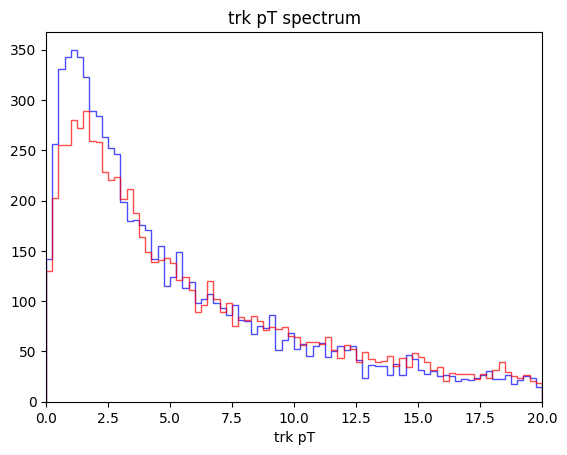

1744.0
622.0
278.0
455.0
179.0
210.0
80
81
1732.0
595.0
246.0
468.0
185.0
238.0


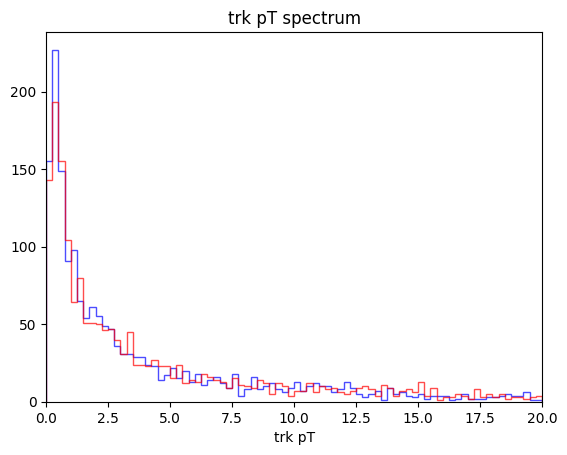

2063.0
492.0
338.0
638.0
306.0
289.0
80
81
2005.0
419.0
317.0
629.0
317.0
323.0


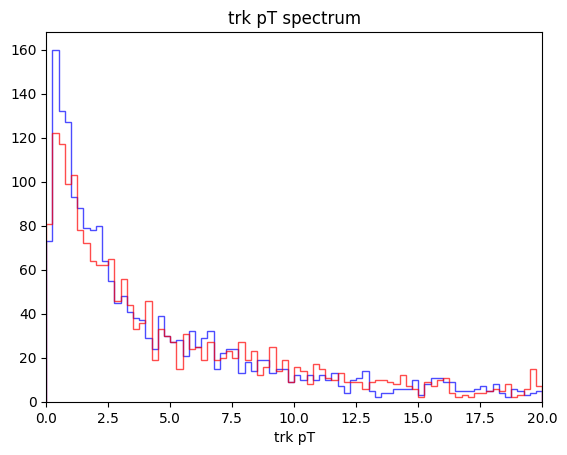

In [74]:

fs = ["5020_PP_Colorless/merged.root", "5020_PbPb_0-5/merged.root", "5020_PbPb_40-50/merged.root"]
f_names = ["pp", "Pb+Pb, 0-5%", "Pb+Pb, 40-50%"]

for fi in range(len(fs)):
    f = ur.open(fs[fi])
    
    h = f["h_jetshape"]
    bin_edges = h.axis("y").edges()
    bin_width = bin_edges[1] - bin_edges[0]
    h_numpy = h.to_numpy()[0]
    this_slice = projectionY(h_numpy)
    plt.hist(bin_edges[:-1], bin_edges, weights=this_slice, lw=1, histtype = 'step', alpha=0.7, fill=False, color="blue")
    
    print(np.sum(this_slice))
    
    slices = [(0, 4), (4, 8), (8, 24), (24, 40), (40, 80)]
    for slici in slices:
        print(np.sum(this_slice[slici[0] : slici[1]]))
    
    h = f["h_trkpt"]
    this_slice = np.sum(h.values().reshape(-1,2), axis=1)[:80]
    print(len(this_slice))
    print(len(bin_edges))
    plt.hist(bin_edges[:-1], bin_edges, weights=this_slice, lw=1, histtype = 'step', alpha=0.7, fill=False, color=L_colors[0])
    
    print(np.sum(this_slice))
    
    slices = [(0, 4), (4, 8), (8, 24), (24, 40), (40, 80)]
    for slici in slices:
        print(np.sum(this_slice[slici[0] : slici[1]]))
    
    plt.title("trk pT spectrum") 
    plt.xlabel('trk pT')
    plt.xlim(0, 20)
    #plt.yscale('log')
    plt.show()


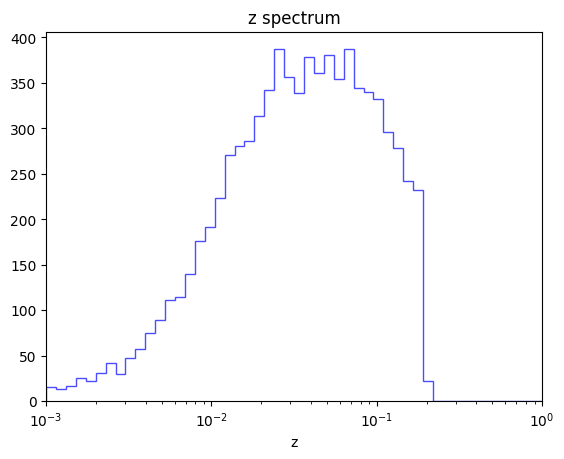

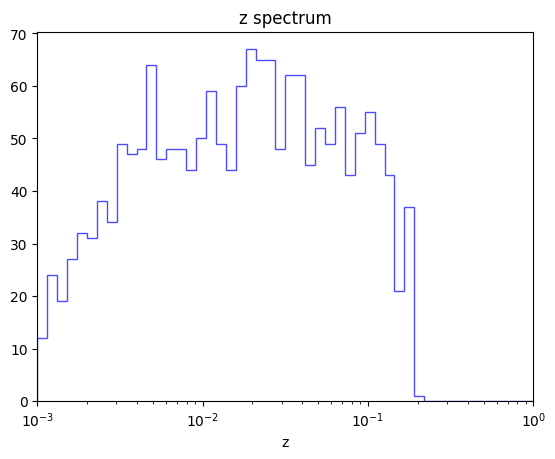

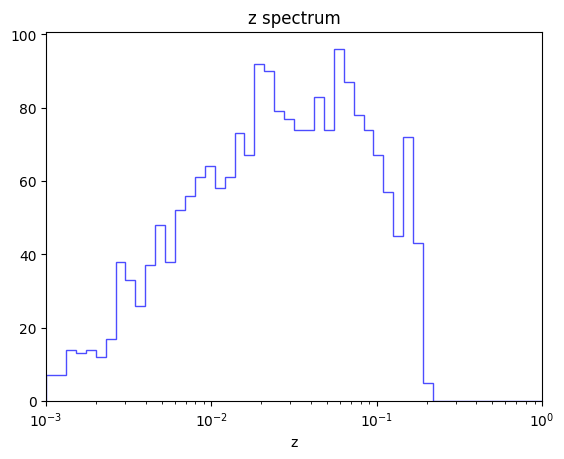

In [80]:


fs = ["5020_PP_Colorless/merged.root", "5020_PbPb_0-5/merged.root", "5020_PbPb_40-50/merged.root"]
f_names = ["pp", "Pb+Pb, 0-5%", "Pb+Pb, 40-50%"]

for fi in range(len(fs)):
    f = ur.open(fs[fi])
    
    h = f["h_jetshape"]
    bin_edges = h.axis("z").edges()
    bin_width = bin_edges[1] - bin_edges[0]
    h_numpy = h.to_numpy()[0]
    this_slice = projectionZ(h_numpy)
    plt.hist(bin_edges[:-1], bin_edges, weights=this_slice, lw=1, histtype = 'step', alpha=0.7, fill=False, color="blue")
    
    plt.title("z spectrum") 
    plt.xlabel('z')
    plt.xlim(1e-3, 1)
    plt.xscale('log')
    #plt.yscale('log')
    plt.show()
    

Njets : 790.0
(0, 4)
1072.0
(4, 8)
1305.0
(8, 24)
2869.0
(24, 40)
1322.0
(40, 80)
1372.0


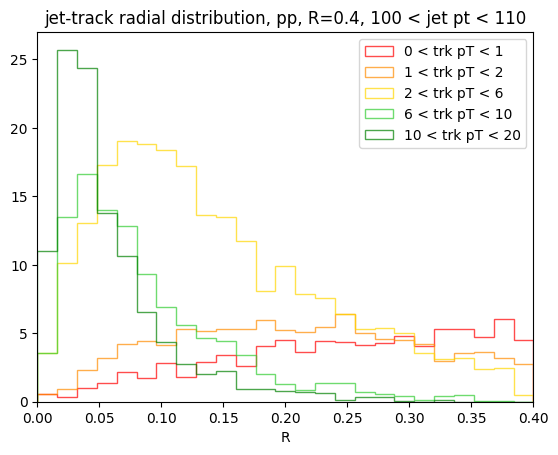

Njets : 138.0
(0, 4)
622.0
(4, 8)
278.0
(8, 24)
455.0
(24, 40)
179.0
(40, 80)
210.0


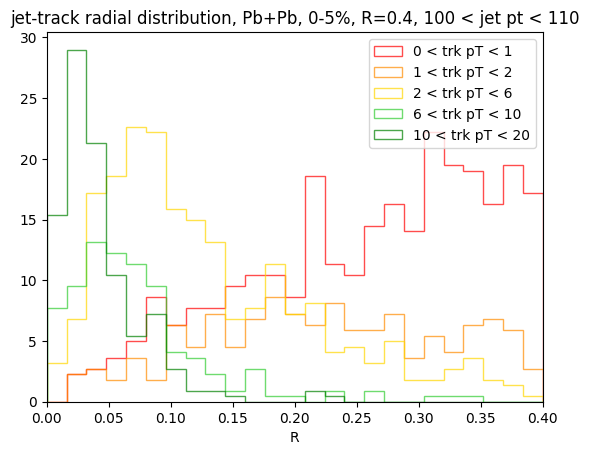

Njets : 192.0
(0, 4)
492.0
(4, 8)
338.0
(8, 24)
638.0
(24, 40)
306.0
(40, 80)
289.0


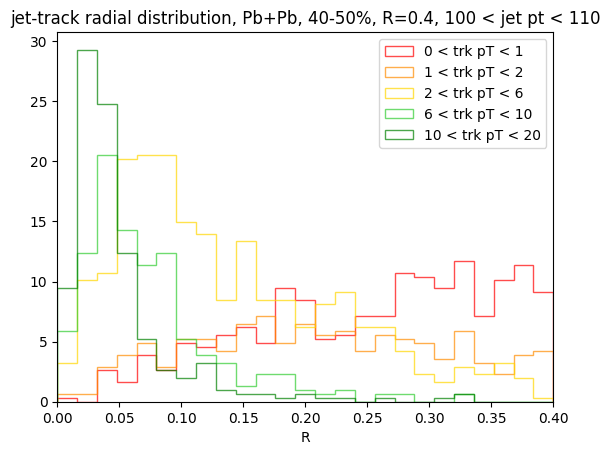

In [11]:
fs = ["5020_PP_Colorless/merged.root", "5020_PbPb_0-5/merged.root", "5020_PbPb_40-50/merged.root"]
f_names = ["pp", "Pb+Pb, 0-5%", "Pb+Pb, 40-50%"]

hs = []

for fi in range(len(fs)):
    f = ur.open(fs[fi])
    h = f["h_jetshape"]
    bin_edges = h.axis("x").edges()
    bin_width = bin_edges[1] - bin_edges[0]
    
    h_jetpt = f["h_jetpt"].to_numpy()[0]
    N_jets = np.sum(h_jetpt)
    print("Njets : " + str(N_jets))
    
    h_numpy = h.to_numpy()[0]
    h_numpy = projectionXY(h_numpy)
    integrals = []
    h_trk = []
    for i in range(len(trk_pt_lo)):
        trk_pt_range = (findbin(h.axis("y"), trk_pt_lo[i]), findbin(h.axis("y"), trk_pt_hi[i]))
        print(trk_pt_range)

        this_slice = yslice(h_numpy, trk_pt_range[0], trk_pt_range[1])
        print(np.sum(this_slice))
        this_slice = this_slice / (N_jets * bin_width)

        plt.hist(bin_edges[:-1], bin_edges, weights=this_slice, lw=1, histtype = 'step', alpha=0.7, fill=False, color=L_colors[i], label='{} < trk pT < {}'.format(trk_pt_lo[i], trk_pt_hi[i]))
        h_trk.append(this_slice)
    hs.append(h_trk)

    plt.legend(loc='upper right')
    plt.title("jet-track radial distribution, " + f_names[fi] + ", R=0.4, 100 < jet pt < 110") 
    plt.xlabel('R')
    plt.xlim(0, 0.4)
    #plt.ylim(0, 0.5)
    plt.show()


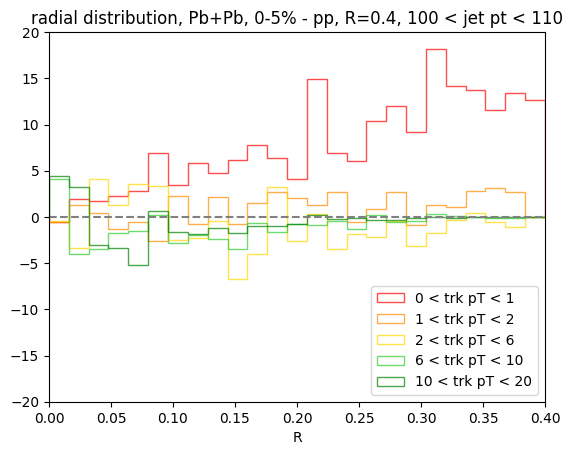

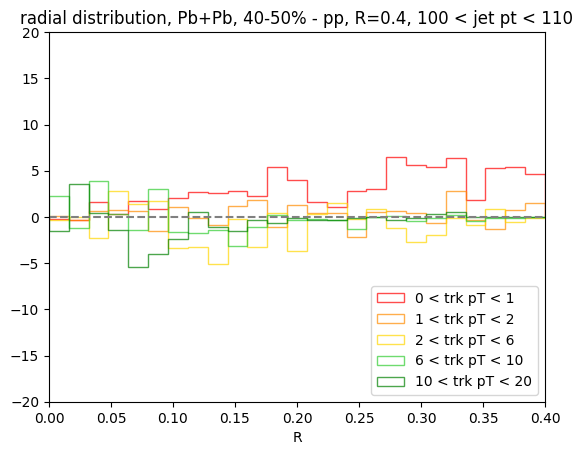

In [17]:
h = f["h_jetshape"]
bin_edges = h.axis("x").edges()
bin_width = bin_edges[1] - bin_edges[0]

for fi in range(1,len(fs)):
    for j in range(len(trk_pt_lo)):
        
        h_to_graph = hs[fi][j] - hs[0][j]

        plt.hist(bin_edges[:-1], bin_edges, weights=h_to_graph, lw=1, histtype = 'step', alpha=0.7, fill=False, color=L_colors[j], label='{} < trk pT < {}'.format(trk_pt_lo[j], trk_pt_hi[j]))
    
    plt.axhline(0, linestyle='--', color='gray')
    plt.legend(loc='lower right')
    plt.title("radial distribution, " + f_names[fi] + " - pp, R=0.4, 100 < jet pt < 110") 
    plt.xlabel('R')
    plt.xlim(0, 0.4)
    plt.ylim(-20, 20)
    plt.show()

[    0.          2632.02250646  9387.69532829 16139.24026441
 20896.33900255 25097.79682295 28146.48599478 30504.3975326
 32459.02773122 33998.86861518 35524.31435567 36666.58577289
 37501.01334227 38328.62602552 38995.5205793  39662.84808379
 40235.67567121 40704.91622479 41145.09369879 41510.8829035
 41774.34254522 42035.81319787 42307.56369757 42498.77155352]
[   0.          680.51454258 1820.09619511 2839.59181047 3543.82497677
 4092.85109571 4661.85611467 4978.05716716 5193.41648848 5381.39642708
 5477.31193507 5608.53780697 5732.38199711 5821.07715624 5945.98799162
 6035.6053069  6089.93279765 6158.27227035 6226.41427207 6261.78512915
 6316.11322532 6372.92855175 6436.4158526  6483.81107786]
[   0.          640.52799974 2419.4165327  4128.05483229 5262.10911028
 6027.72216951 6671.33179081 7075.56295125 7487.87195789 7745.23958412
 7981.37106253 8180.25251625 8372.27385789 8535.47027298 8675.5261304
 8828.17587009 8922.57948297 9050.50068705 9141.08011222 9200.5636155
 9257.59476

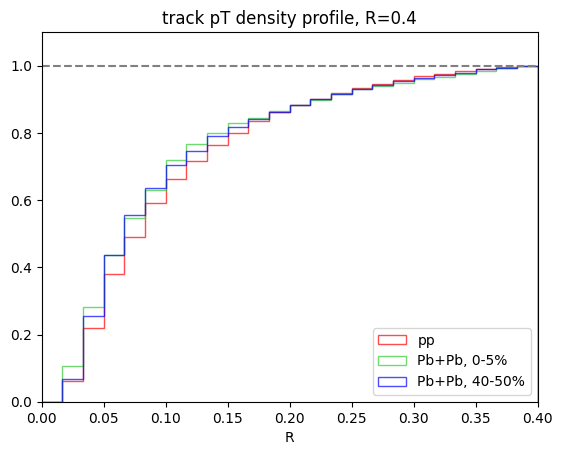

/tmp/ipykernel_607555/2493676355.py:32: RuntimeWarning: invalid value encountered in divide
  h_to_graph = np.where(hs[0] != 0, np.divide(hs[i], hs[0]), 0)


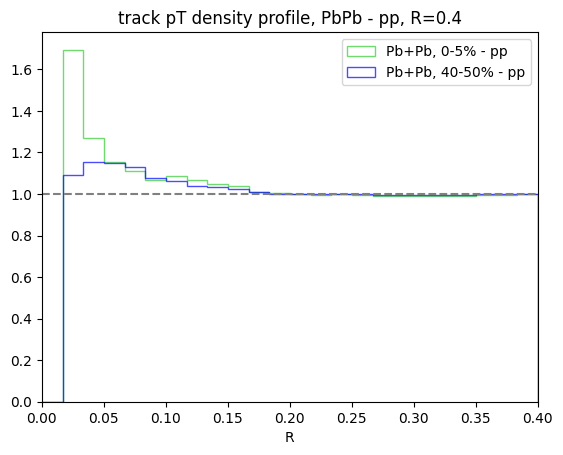

[]


In [22]:
hs = []
for i in range(len(fs)):
    f = ur.open(fs[i])
    h = f["h_ptshape"].to_numpy()[0]

    n_r_bins = 25
    bin_edges = np.linspace(0, 0.4, 25)
    bin_widths = 0.4 / n_r_bins

    integrals = []
    
    h_to_graph = np.array([np.sum(xslice(projectionX(h), 0, i)) for i in range(n_r_bins-1)])
    print(h_to_graph)
    
    # normalization by inclusive RL selection
    h_to_graph = h_to_graph / h_to_graph[len(h_to_graph)-1]
    hs.append(h_to_graph)
    
    plt.hist(bin_edges[:-1], bin_edges, weights=h_to_graph, lw=1, histtype = 'step', alpha=0.7, fill=False, color=L_colors[3*i], label=f_names[i])
    
plt.axhline(1, linestyle='--', color='gray')
plt.legend(loc='lower right')
plt.title("track pT density profile, R=0.4") 
plt.xlabel('R')
plt.xlim(0, 0.4)
plt.ylim(0, 1.1)
plt.show()



for i in range(1,len(fs)):
    h_to_graph = np.where(hs[0] != 0, np.divide(hs[i], hs[0]), 0)
    
    plt.hist(bin_edges[:-1], bin_edges, weights=h_to_graph, lw=1, histtype = 'step', alpha=0.7, fill=False, color=L_colors[3*i], label=f_names[i] + " - pp")
    
plt.axhline(1, linestyle='--', color='gray')
plt.legend(loc='upper right')
plt.title("track pT density profile, PbPb - pp, R=0.4") 
plt.xlabel('R')
plt.xlim(0, 0.4)
plt.show()
print(integrals)

(0, 4)
(4, 8)
(8, 16)
(16, 28)
(28, 80)


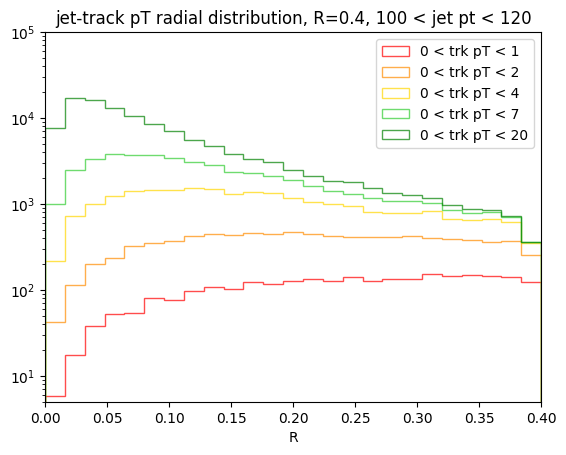

[2652.4142868498984, 9026.427425463944, 24904.66080922459, 48318.5166105395, 118696.9096408813]


In [158]:
f = ur.open("pt100_R0p4_temptemp2_50k.root")
h = f["h_ptshape"]
h_numpy = h.to_numpy()[0]
h_numpy = projectionXY(h_numpy)

bin_edges = h.axis("x").edges()
bin_width = bin_edges[1] - bin_edges[0]

integrals = []
for i in range(len(trk_pt_lo)):
    trk_pt_range = (findbin(h.axis("y"), trk_pt_lo[i]), findbin(h.axis("y"), trk_pt_hi[i]))
    print(trk_pt_range)
    
    this_slice = yslice(h_numpy, 0, trk_pt_range[1])
    integrals.append(np.sum(this_slice))
    #this_slice = this_slice / np.sum(this_slice)
    
    plt.hist(bin_edges[:-1], bin_edges, weights=this_slice, lw=1, histtype = 'step', alpha=0.7, fill=False, color=L_colors[i], label='{} < trk pT < {}'.format(0, trk_pt_hi[i]))
    
plt.legend(loc='upper right')
plt.title("jet-track pT radial distribution, R=0.4, 100 < jet pt < 120") 
plt.xlabel('R')
plt.yscale("log")
plt.xlim(0, 0.4)
plt.ylim(5e0, 1e5)
plt.show()
print(integrals)